In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from fcmeans import FCM
from sklearn.metrics import silhouette_score 

%matplotlib inline 

In [1]:
# ! pip install fuzzy-c-means 

     ---------------------------------------- 2.1/2.1 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [9]:
df.Gender, uniques = pd.factorize(df.Gender)
map_gender = dict(zip(np.arange(len(uniques)), uniques))
map_gender
df.Gender.map(lambda x: map_gender[x])

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


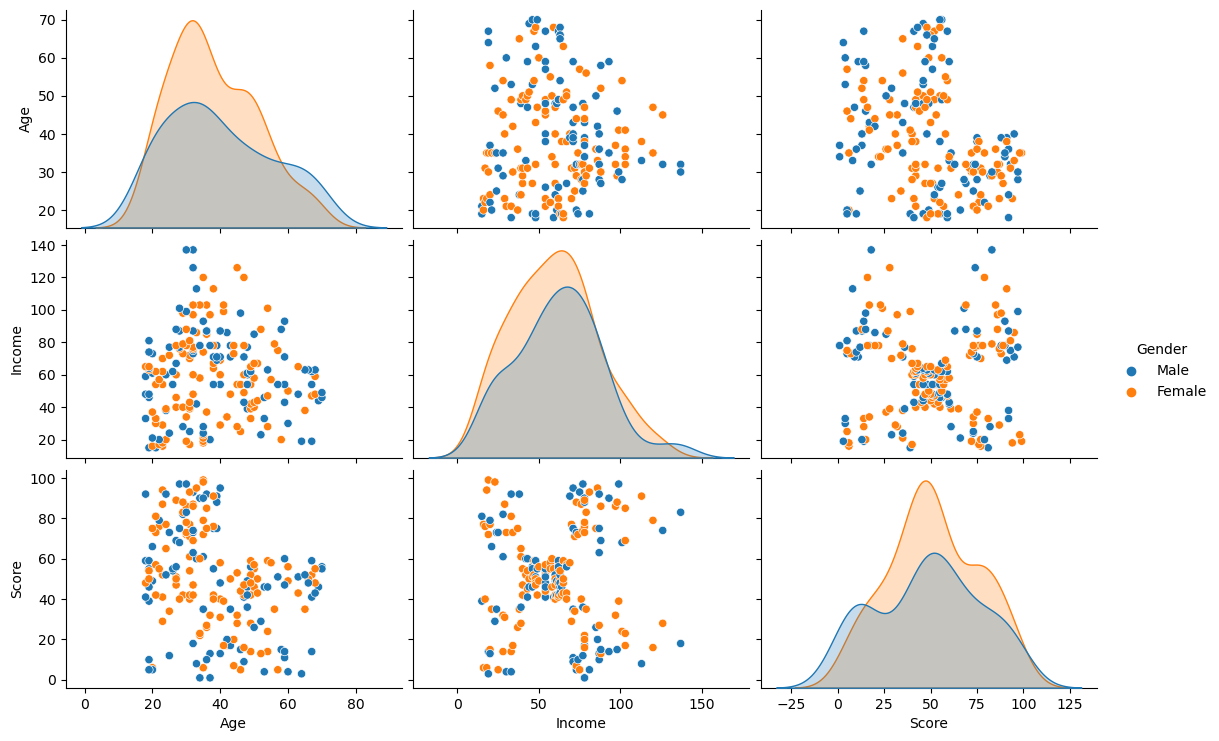

In [7]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [11]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
# X = (X - X.mean(axis=0))/ X.std()

## K-Means

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


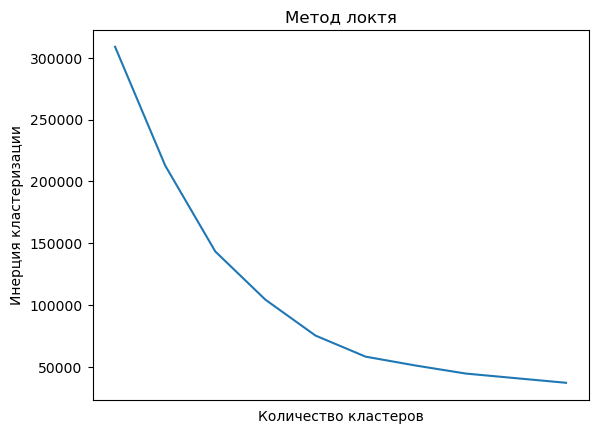

In [12]:
n_inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    n_inertia.append(km.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, 11), y=n_inertia, ax=ax)
ax.set_title('Метод локтя')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Инерция кластеризации')
plt.xticks(np.arange(1, 1))
plt.show()
# ax.set_title('Метод локтя')
# ax.set_xlabel('Количество кластеров')
# ax.set_ylabel('Качество кластеризации')

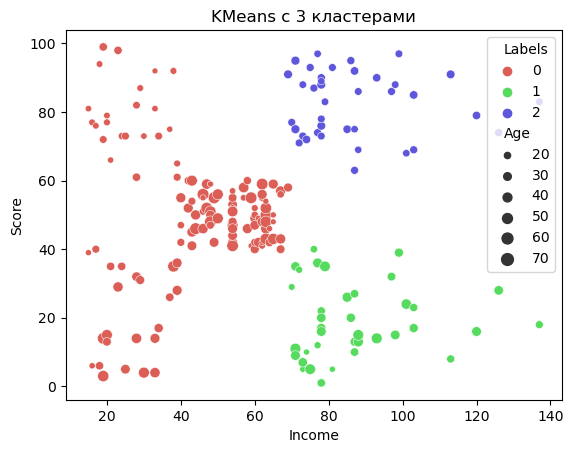

In [16]:
km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 3))

plt.title('KMeans c 3 кластерами')
plt.show()

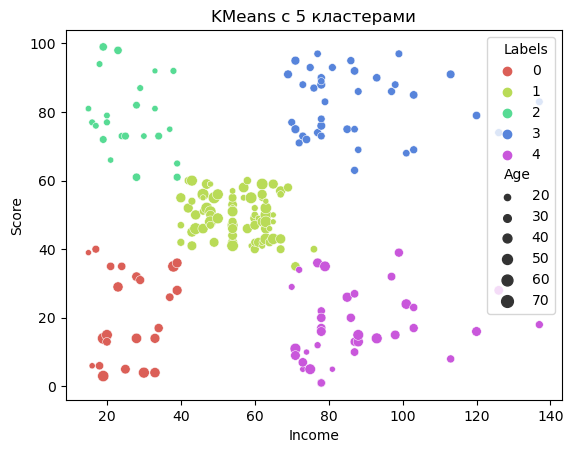

In [17]:
km5 = KMeans(n_clusters=5).fit(X.drop(['Labels'], axis=1))
X['Labels'] = km5.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 5))

plt.title('KMeans c 5 кластерами')
plt.show()

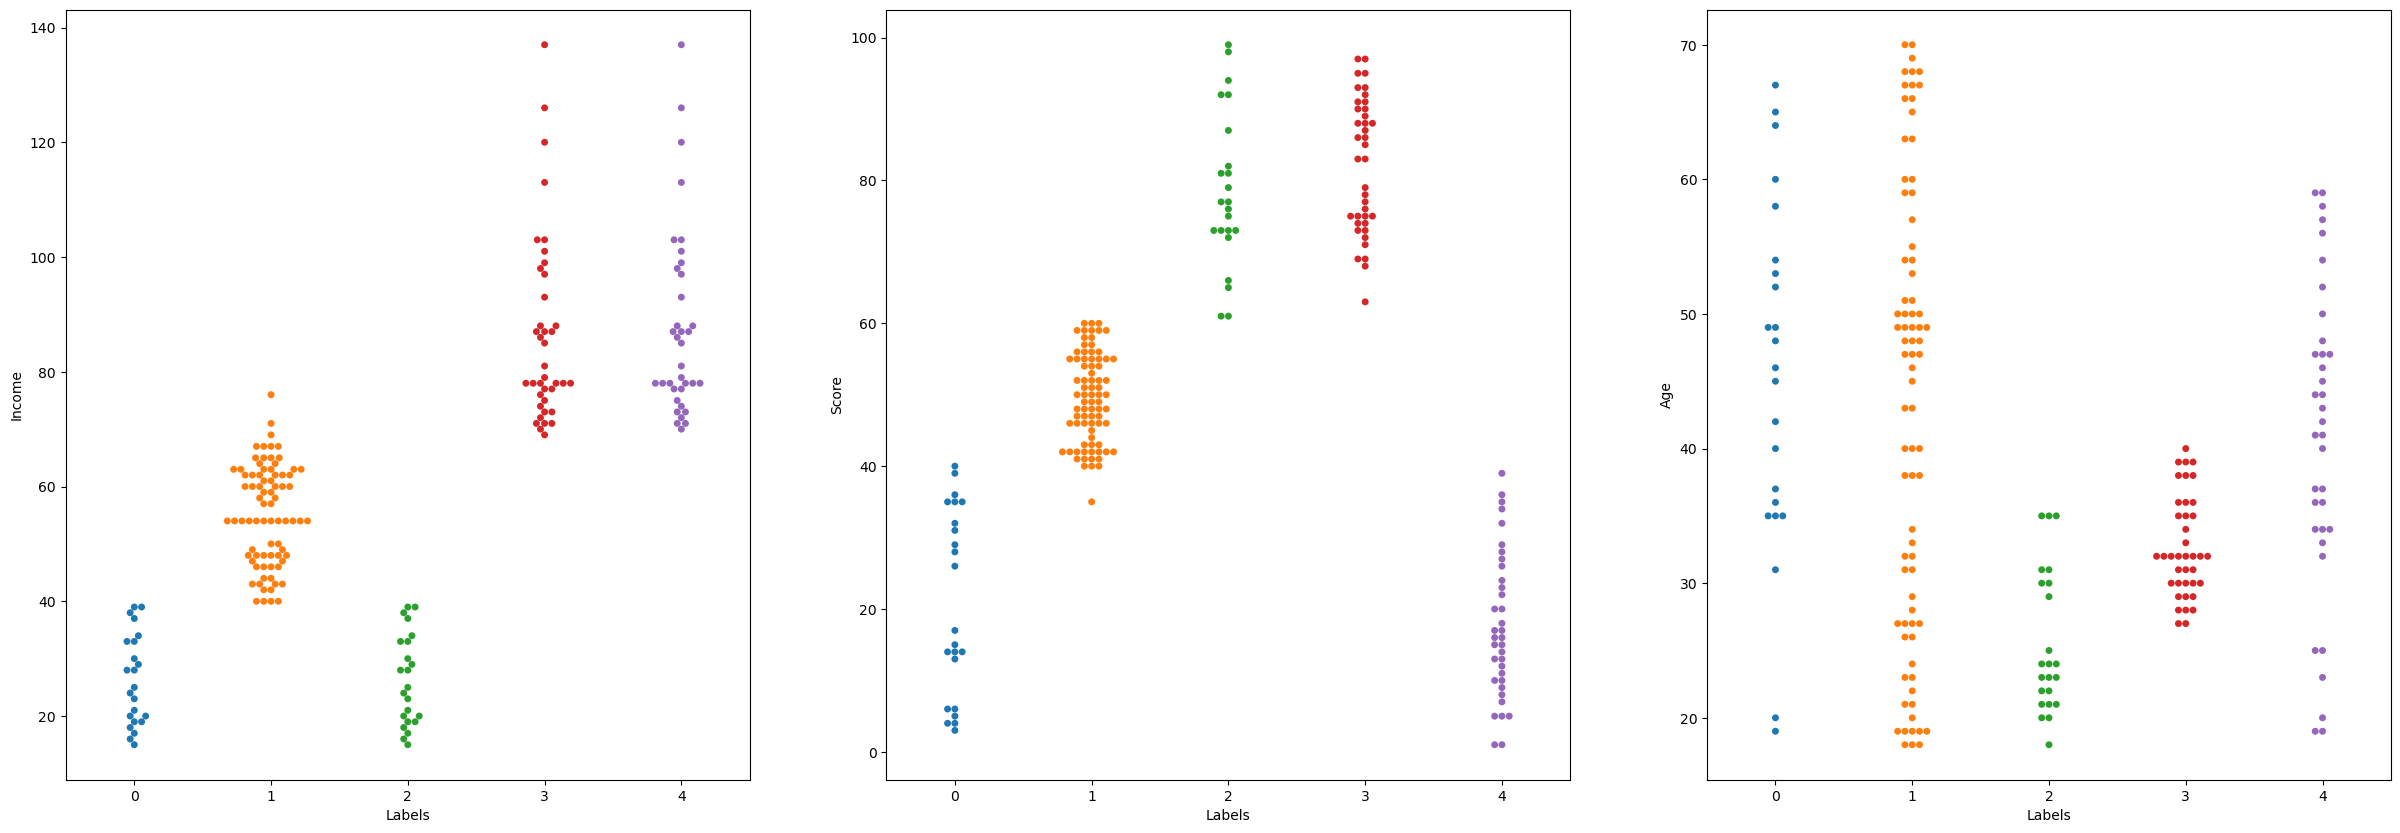

In [18]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)

ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)

ax = fig.add_subplot(133)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax)

plt.show()

In [19]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.44428597560893024


## Иерархическая кластеризация (аггломеративная)

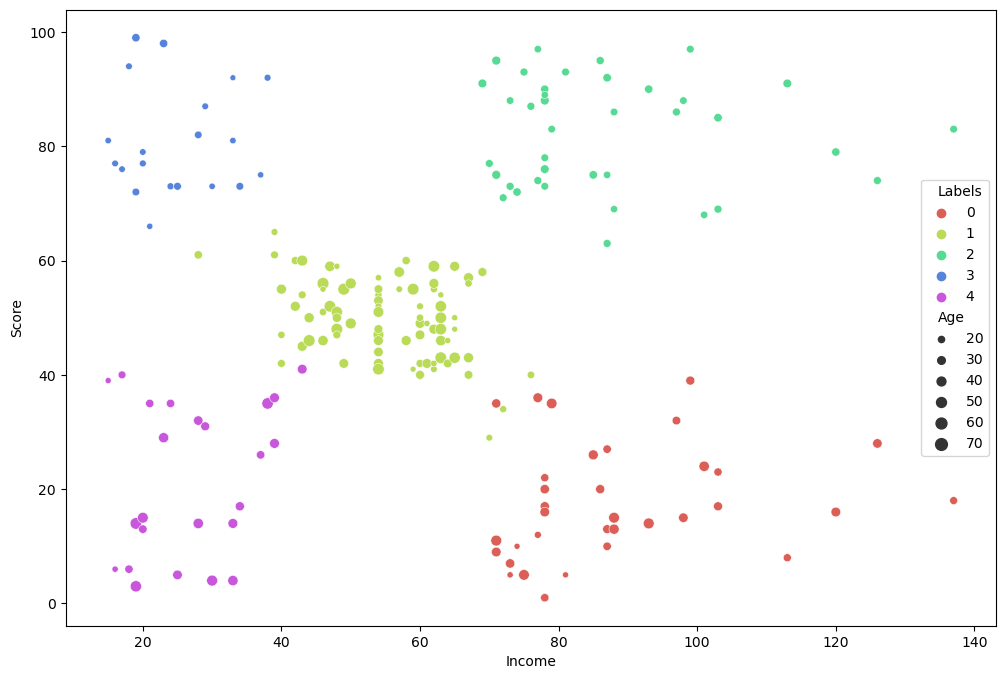

In [22]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X.drop(['Labels'], axis=1)) # ward, complete...

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', 5))
plt.show()

In [23]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.43542057757306424


In [24]:
dist = distance_matrix(X.drop(['Labels'], axis=1), X.drop(['Labels'], axis=1))
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [25]:
hierarchy_clustering = hierarchy.linkage(dist, 'complete')

C:\Users\User\AppData\Local\Temp\ipykernel_11816\1577177698.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hierarchy_clustering = hierarchy.linkage(dist, 'complete')


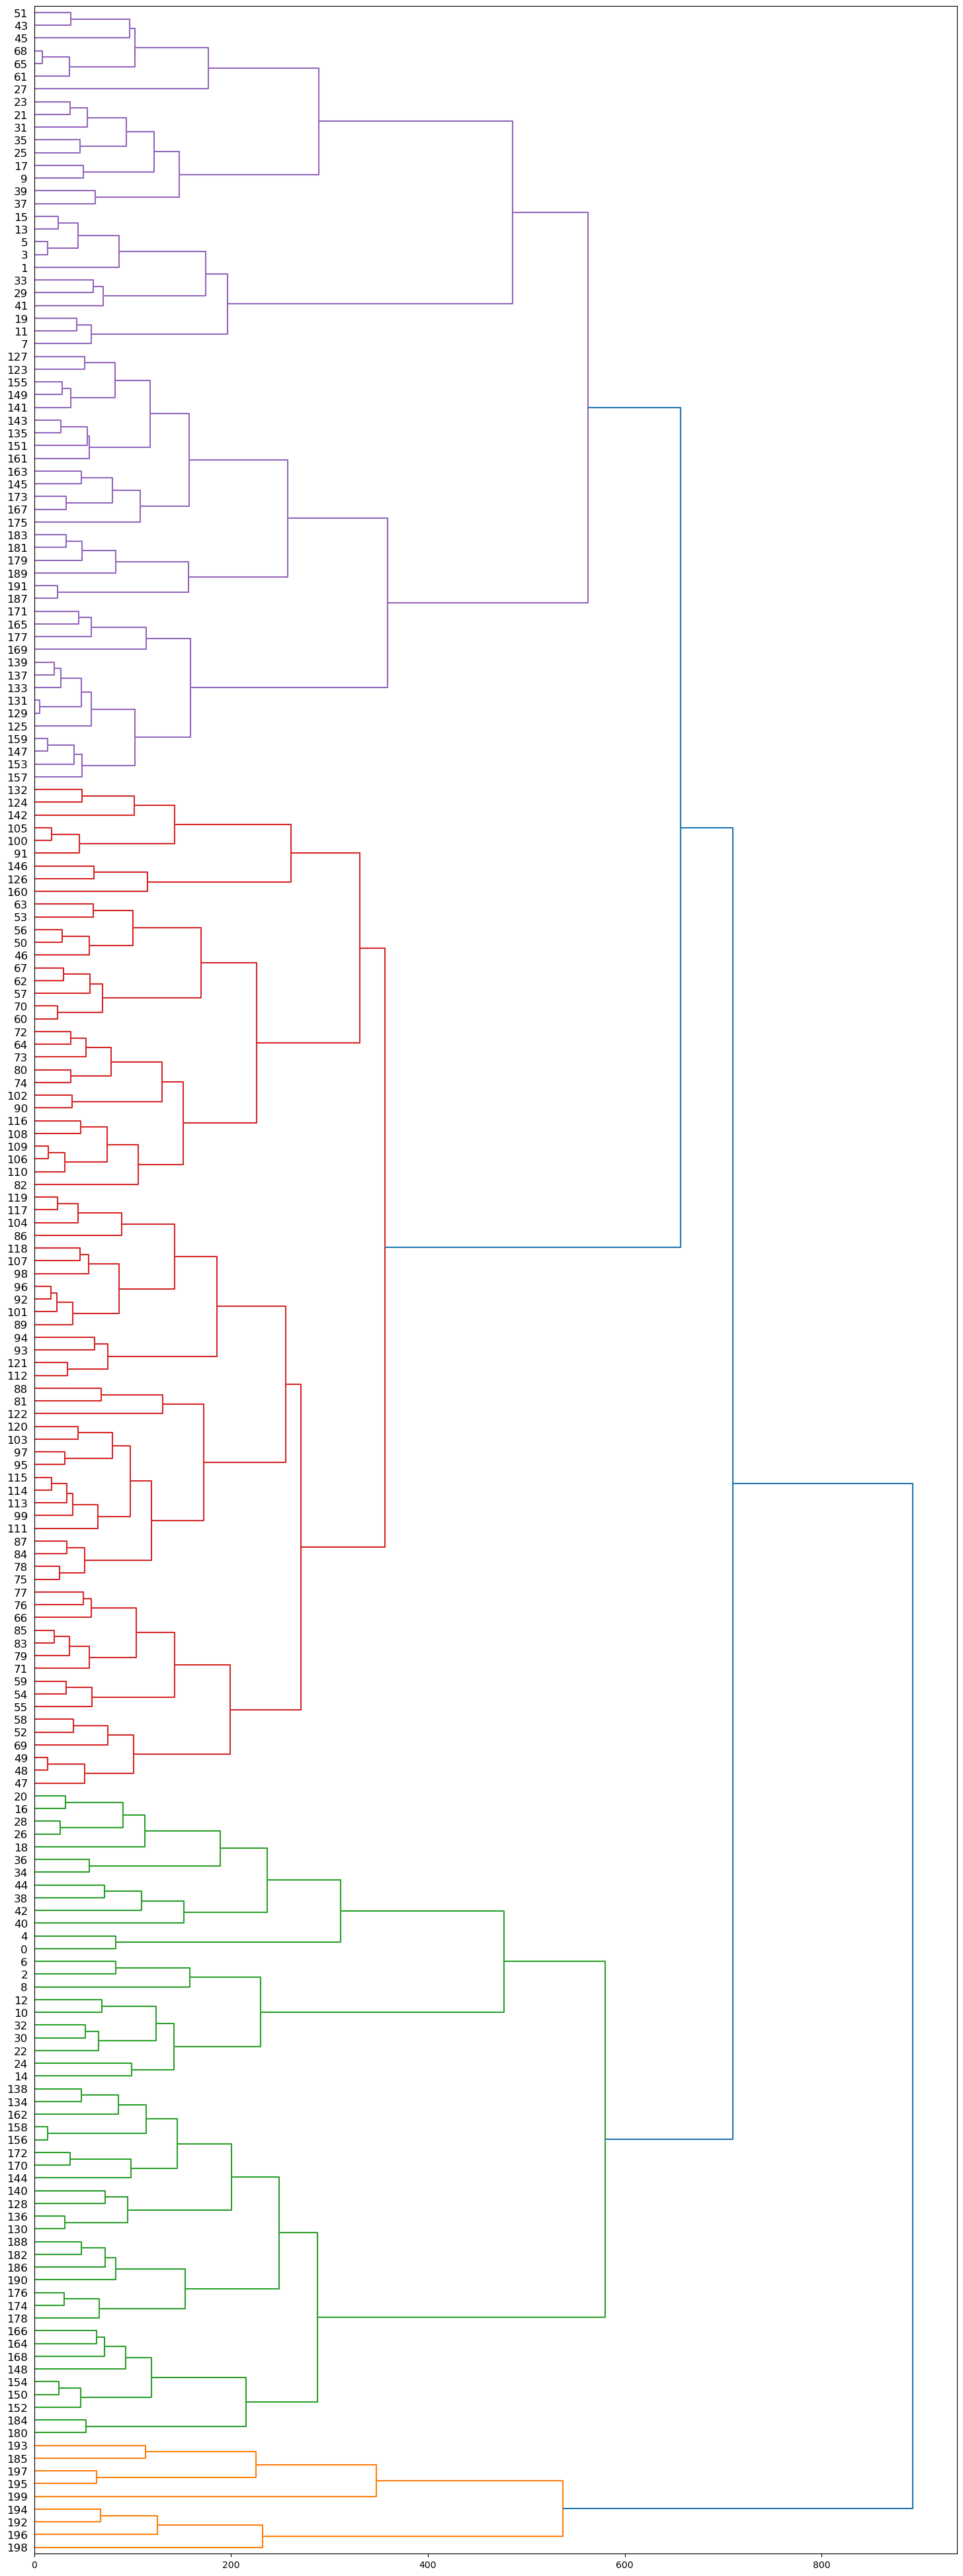

In [26]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(hierarchy_clustering, leaf_font_size=12, orientation='right')

## DBSCAN

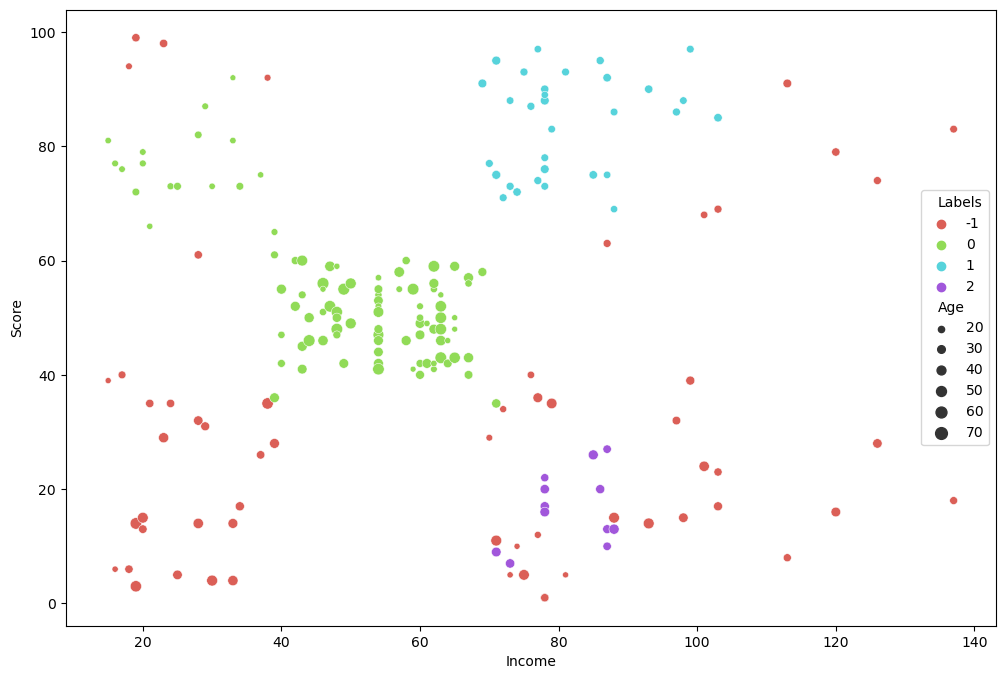

In [27]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=12, min_samples=6).fit(X.drop(['Labels'], axis=1))

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.show()


In [28]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.1806368944323813


## C-means

In [40]:
X.drop(['Labels'], axis=1, inplace=True)
fcm = FCM(n_clusters=7)
fcm.fit(X.values)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(X.values) 

KeyError: "['Labels'] not found in axis"

In [30]:
X['Labels'] = fcm_labels

In [35]:
sns.relplot(x='Income', y='Score', hue='Labels', 
            size='Age', data=X, palette = sns.color_palette('hls', 6)) 

ValueError: Could not interpret value `Labels` for parameter `hue`

In [32]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.3869226398818909
